In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import tools
from tools import cmp

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/lustre/scratch117/cellgen/team297/kt16/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_header()

scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.20.2 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.1


In [2]:
# read in the chen data
adata = sc.read_h5ad('dataset/Chen/chen_13_filtered.h5ad')
adata

AnnData object with n_obs × n_vars = 23486 × 2403
    obs: 'barcode', 'study', 'sample', 'group', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'is_doublet', 'filter_rna', 'leiden', 'leiden_R', 'celltypes', 'celltypes_group'
    var: 'GeneID', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltypes_colors', 'celltypes_group_colors', 'dendrogram_leiden', 'dendrogram_leiden_R', 'hvg', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [3]:
raw = sc.read_h5ad('dataset/Chen/chen_13.h5ad')
raw

AnnData object with n_obs × n_vars = 36424 × 25044
    obs: 'barcode', 'study', 'sample', 'group'
    var: 'GeneID'

In [17]:
# subset raw to filtered
raw = raw[raw.obs_names.isin(adata.obs_names)].copy()
raw

AnnData object with n_obs × n_vars = 23486 × 25044
    obs: 'barcode', 'study', 'sample', 'group'
    var: 'GeneID'

In [20]:
raw.obs = adata.obs.copy()

In [24]:
raw.obs['celltypes'].cat.categories

Index(['BE', 'HE', 'CE', 'LE-KLK3', 'LE-KLK3_cycling', 'Myofibroblast',
       'Fibroblast', 'Endothelial', 'Mast cell', 'Mac1', 'Mac2', 'Mac-MT1',
       'Mono', 'DC', 'Mac-cycling', 'CD8T', 'CD8T_cycling', 'CD4T', 'Treg',
       'NKT', 'NK CD16neg', 'NK CD16pos', 'B cell', 'non-T'],
      dtype='object')

In [27]:
raw.obs['celltypes'] = raw.obs['celltypes'].cat.rename_categories({'Mac-MT1': 'Mac3'})

In [32]:
raw.uns = adata.uns.copy()
raw.obsm = adata.obsm.copy()

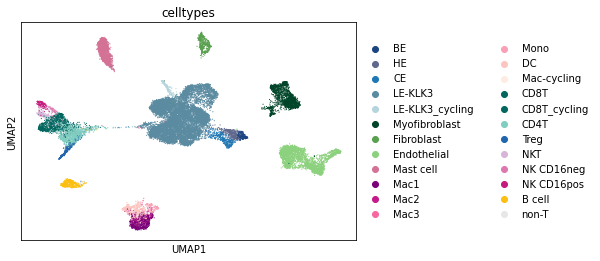

In [33]:
sc.pl.umap(raw, color = ['celltypes'], ncols = 1)

In [27]:
adata.write_h5ad('../karthaus_processed.h5ad', compression = 'gzip')

In [11]:
info = pd.read_csv('dataset/Karthaus/info_to_replace_karthaus.txt', sep = '\t', index_col = 0)
info

,BatchID,Umi_count,Gene_count,Total_reads,Gene_saturation_fraction,UMI_saturation_fraction,Mito_UMI_fraction,BC_swap_fraction,EmptyP_FDR,EmptyP_negLogP
SampleID,,,,,,,,,,
HP100_NT_EPCAMneg_INTACT_19_id-AAACGAACAACCCTCT,HP100_NT_EPCAMneg_INTACT_19,16781,3886,74706,0.894617,0.798271,0.046660,0.001488,0.000139,-19597.973470
HP100_NT_EPCAMneg_INTACT_19_id-AAAGGGCGTTCCCACT,HP100_NT_EPCAMneg_INTACT_19,21923,4344,94599,0.906532,0.792305,0.052365,0.000274,0.000139,-22419.554280
HP100_NT_EPCAMneg_INTACT_19_id-AAAGGGCTCAAACGAA,HP100_NT_EPCAMneg_INTACT_19,694,324,2920,0.799997,0.790036,0.171470,0.000000,0.000139,-1868.837517
HP100_NT_EPCAMneg_INTACT_19_id-AAAGGTATCGGAAACG,HP100_NT_EPCAMneg_INTACT_19,7059,2266,28770,0.875215,0.777728,0.038816,0.000566,0.000139,-10685.575770
HP100_NT_EPCAMneg_INTACT_19_id-AAAGGTATCTAGTTCT,HP100_NT_EPCAMneg_INTACT_19,2638,978,10081,0.818752,0.764135,0.449583,0.000000,0.000139,-5112.006409
...,...,...,...,...,...,...,...,...,...,...
HP97_NT_EPCAMpos_ADT_10_id-TTTGTTGCACTGCGTG,HP97_NT_EPCAMpos_ADT_10,22642,4118,59366,0.830735,0.636635,0.067529,0.000618,0.000108,-16012.424890
HP97_NT_EPCAMpos_ADT_10_id-TTTGTTGCAGTATACC,HP97_NT_EPCAMpos_ADT_10,3147,1455,8364,0.760557,0.635488,0.033683,0.000318,0.000108,-5307.716820
HP97_NT_EPCAMpos_ADT_10_id-TTTGTTGGTCGTATTG,HP97_NT_EPCAMpos_ADT_10,4818,1671,12599,0.712770,0.630762,0.304068,0.001244,0.000108,-6414.857609


In [14]:
adata.obs_names = adata.obs['Barcode']

In [16]:
for x in info.columns:
    if x != 'BatchID':
        adata.obs[x] = pd.Series(info[x])

In [21]:
adata.obs.columns = ['Barcode', 'batchID', 'pID', 'isTumorRegion', 'treatment', 'sortType', 'ver10x', 'batch', 'PatientNum', 'n_genes_by_counts', 'DONTUSE_total_counts', 'DONTUSE_total_counts_mt', 'DONTUSE_pct_counts_mt', 'leiden', 'leiden_R', 'celltypes', 'celltypes_group', 'Umi_count', 'Gene_count', 'Total_reads', 'Gene_saturation_fraction', 'UMI_saturation_fraction', 'Mito_UMI_fraction', 'BC_swap_fraction', 'EmptyP_FDR', 'EmptyP_negLogP']

In [23]:
adata.obs[['n_genes_by_counts', 'DONTUSE_total_counts', 'DONTUSE_total_counts_mt', 'DONTUSE_pct_counts_mt', 'Umi_count', 'Gene_count', 'Total_reads']]

,n_genes_by_counts,DONTUSE_total_counts,DONTUSE_total_counts_mt,DONTUSE_pct_counts_mt,Umi_count,Gene_count,Total_reads
Barcode,,,,,,,
HP100_NT_EPCAMneg_INTACT_19_id-AAACGAACAACCCTCT,3886,4819.687988,57.665184,1.196451,16781,3886,74706
HP100_NT_EPCAMneg_INTACT_19_id-AAAGGGCGTTCCCACT,4344,5066.248535,60.275646,1.189749,21923,4344,94599
HP100_NT_EPCAMneg_INTACT_19_id-AAAGGGCTCAAACGAA,324,1354.662842,66.732269,4.926116,694,324,2920
HP100_NT_EPCAMneg_INTACT_19_id-AAAGGTATCGGAAACG,2266,4228.824707,56.602547,1.338494,7059,2266,28770
HP100_NT_EPCAMneg_INTACT_19_id-AAAGGTATCTAGTTCT,978,2533.499756,99.951775,3.945206,2638,978,10081
...,...,...,...,...,...,...,...
HP97_NT_EPCAMpos_ADT_10_id-TTTGTTGCACTGCGTG,4118,4589.876465,66.647873,1.452062,22642,4118,59366
HP97_NT_EPCAMpos_ADT_10_id-TTTGTTGCAGTATACC,1455,3713.204590,56.357437,1.517757,3147,1455,8364
HP97_NT_EPCAMpos_ADT_10_id-TTTGTTGGTCGTATTG,1671,3305.646729,93.958328,2.842359,4818,1671,12599


In [25]:
adata.obs.index.name = None

In [26]:
adata.obs

,Barcode,batchID,pID,isTumorRegion,treatment,sortType,ver10x,batch,PatientNum,n_genes_by_counts,...,celltypes_group,Umi_count,Gene_count,Total_reads,Gene_saturation_fraction,UMI_saturation_fraction,Mito_UMI_fraction,BC_swap_fraction,EmptyP_FDR,EmptyP_negLogP
HP100_NT_EPCAMneg_INTACT_19_id-AAACGAACAACCCTCT,HP100_NT_EPCAMneg_INTACT_19_id-AAACGAACAACCCTCT,Sample3_HP100_NT_EPCAMneg_INTACT_19,HP100,NT,INTACT,EPCAMneg,v3,HP100_NT_EPCAMneg_INTACT_19,Sample3,3886,...,Fibroblast,16781,3886,74706,0.894617,0.798271,0.046660,0.001488,0.000139,-19597.973470
HP100_NT_EPCAMneg_INTACT_19_id-AAAGGGCGTTCCCACT,HP100_NT_EPCAMneg_INTACT_19_id-AAAGGGCGTTCCCACT,Sample3_HP100_NT_EPCAMneg_INTACT_19,HP100,NT,INTACT,EPCAMneg,v3,HP100_NT_EPCAMneg_INTACT_19,Sample3,4344,...,Lymphatic,21923,4344,94599,0.906532,0.792305,0.052365,0.000274,0.000139,-22419.554280
HP100_NT_EPCAMneg_INTACT_19_id-AAAGGGCTCAAACGAA,HP100_NT_EPCAMneg_INTACT_19_id-AAAGGGCTCAAACGAA,Sample3_HP100_NT_EPCAMneg_INTACT_19,HP100,NT,INTACT,EPCAMneg,v3,HP100_NT_EPCAMneg_INTACT_19,Sample3,324,...,NK cell,694,324,2920,0.799997,0.790036,0.171470,0.000000,0.000139,-1868.837517
HP100_NT_EPCAMneg_INTACT_19_id-AAAGGTATCGGAAACG,HP100_NT_EPCAMneg_INTACT_19_id-AAAGGTATCGGAAACG,Sample3_HP100_NT_EPCAMneg_INTACT_19,HP100,NT,INTACT,EPCAMneg,v3,HP100_NT_EPCAMneg_INTACT_19,Sample3,2266,...,Lymphatic,7059,2266,28770,0.875215,0.777728,0.038816,0.000566,0.000139,-10685.575770
HP100_NT_EPCAMneg_INTACT_19_id-AAAGGTATCTAGTTCT,HP100_NT_EPCAMneg_INTACT_19_id-AAAGGTATCTAGTTCT,Sample3_HP100_NT_EPCAMneg_INTACT_19,HP100,NT,INTACT,EPCAMneg,v3,HP100_NT_EPCAMneg_INTACT_19,Sample3,978,...,Fibroblast,2638,978,10081,0.818752,0.764135,0.449583,0.000000,0.000139,-5112.006409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HP97_NT_EPCAMpos_ADT_10_id-TTTGTTGCACTGCGTG,HP97_NT_EPCAMpos_ADT_10_id-TTTGTTGCACTGCGTG,Sample7_HP97_NT_EPCAMpos_ADT_10,HP97,NT,ADT,EPCAMpos,v3,HP97_NT_EPCAMpos_ADT_10,Sample7,4118,...,LE,22642,4118,59366,0.830735,0.636635,0.067529,0.000618,0.000108,-16012.424890
HP97_NT_EPCAMpos_ADT_10_id-TTTGTTGCAGTATACC,HP97_NT_EPCAMpos_ADT_10_id-TTTGTTGCAGTATACC,Sample7_HP97_NT_EPCAMpos_ADT_10,HP97,NT,ADT,EPCAMpos,v3,HP97_NT_EPCAMpos_ADT_10,Sample7,1455,...,BE,3147,1455,8364,0.760557,0.635488,0.033683,0.000318,0.000108,-5307.716820
HP97_NT_EPCAMpos_ADT_10_id-TTTGTTGGTCGTATTG,HP97_NT_EPCAMpos_ADT_10_id-TTTGTTGGTCGTATTG,Sample7_HP97_NT_EPCAMpos_ADT_10,HP97,NT,ADT,EPCAMpos,v3,HP97_NT_EPCAMpos_ADT_10,Sample7,1671,...,LE,4818,1671,12599,0.712770,0.630762,0.304068,0.001244,0.000108,-6414.857609
HP97_NT_EPCAMpos_ADT_10_id-TTTGTTGTCAGGACGA,HP97_NT_EPCAMpos_ADT_10_id-TTTGTTGTCAGGACGA,Sample7_HP97_NT_EPCAMpos_ADT_10,HP97,NT,ADT,EPCAMpos,v3,HP97_NT_EPCAMpos_ADT_10,Sample7,893,...,BE,1488,893,3899,0.731095,0.619501,0.013441,0.000000,0.000108,-3265.372994


In [28]:
adata2 = sc.read_h5ad('dataset/Karthaus/karthaus.h5ad')
adata2

AnnData object with n_obs × n_vars = 120300 × 33538
    obs: 'Barcode', 'batchID', 'pID', 'isTumorRegion', 'treatment', 'sortType', 'ver10x', 'batch', 'PatientNum'
    var: 'ID', 'Symbol'

In [29]:
adata

AnnData object with n_obs × n_vars = 120300 × 4915
    obs: 'Barcode', 'batchID', 'pID', 'isTumorRegion', 'treatment', 'sortType', 'ver10x', 'batch', 'PatientNum', 'n_genes_by_counts', 'DONTUSE_total_counts', 'DONTUSE_total_counts_mt', 'DONTUSE_pct_counts_mt', 'leiden', 'leiden_R', 'celltypes', 'celltypes_group', 'Umi_count', 'Gene_count', 'Total_reads', 'Gene_saturation_fraction', 'UMI_saturation_fraction', 'Mito_UMI_fraction', 'BC_swap_fraction', 'EmptyP_FDR', 'EmptyP_negLogP'
    var: 'ID', 'Symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'PatientNum_colors', 'batch_colors', 'celltypes_colors', 'celltypes_group_colors', 'hvg', 'isTumorRegion_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [36]:
adata2.obs = adata.obs.copy()
adata2.obsm = adata.obsm.copy()
adata2.uns = adata.uns.copy()
adata2.obsp = adata.obsp.copy()
adata2.var = adata.raw.var.copy()

In [34]:
test = adata.raw.to_adata()
test

AnnData object with n_obs × n_vars = 120300 × 33538
    obs: 'Barcode', 'batchID', 'pID', 'isTumorRegion', 'treatment', 'sortType', 'ver10x', 'batch', 'PatientNum', 'n_genes_by_counts', 'DONTUSE_total_counts', 'DONTUSE_total_counts_mt', 'DONTUSE_pct_counts_mt', 'leiden', 'leiden_R', 'celltypes', 'celltypes_group', 'Umi_count', 'Gene_count', 'Total_reads', 'Gene_saturation_fraction', 'UMI_saturation_fraction', 'Mito_UMI_fraction', 'BC_swap_fraction', 'EmptyP_FDR', 'EmptyP_negLogP'
    var: 'ID', 'Symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'PatientNum_colors', 'batch_colors', 'celltypes_colors', 'celltypes_group_colors', 'hvg', 'isTumorRegion_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'

In [37]:
adata2

AnnData object with n_obs × n_vars = 120300 × 33538
    obs: 'Barcode', 'batchID', 'pID', 'isTumorRegion', 'treatment', 'sortType', 'ver10x', 'batch', 'PatientNum', 'n_genes_by_counts', 'DONTUSE_total_counts', 'DONTUSE_total_counts_mt', 'DONTUSE_pct_counts_mt', 'leiden', 'leiden_R', 'celltypes', 'celltypes_group', 'Umi_count', 'Gene_count', 'Total_reads', 'Gene_saturation_fraction', 'UMI_saturation_fraction', 'Mito_UMI_fraction', 'BC_swap_fraction', 'EmptyP_FDR', 'EmptyP_negLogP'
    var: 'ID', 'Symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'PatientNum_colors', 'batch_colors', 'celltypes_colors', 'celltypes_group_colors', 'hvg', 'isTumorRegion_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

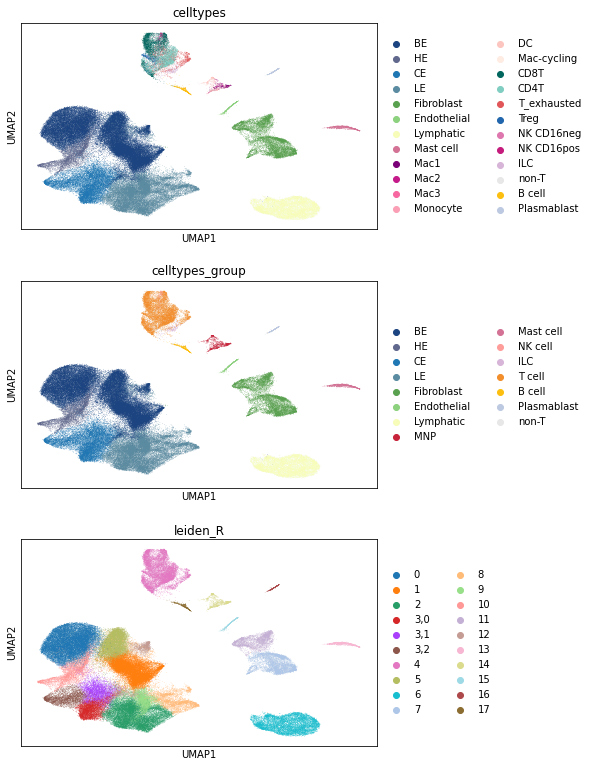

In [39]:
sc.pl.umap(adata2, color = ['celltypes', 'celltypes_group', 'leiden_R'], ncols = 1)

In [40]:
adata.write_h5ad('../karthaus_processed.h5ad', compression = 'gzip')